In [1]:
import reaktoro as rkt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define system with aq. species and gibbsite mineral
db = rkt.PhreeqcDatabase("phreeqc.dat")
solution = rkt.AqueousPhase(rkt.speciate("H O Al Na Cl"))
solution.setActivityModel(rkt.ActivityModelDebyeHuckelPHREEQC())
Gibbsite = rkt.MineralPhase("Gibbsite")
system = rkt.ChemicalSystem(db, solution, Gibbsite)

# Create a solver with fixed T, P, pH
specs = rkt.EquilibriumSpecs(system)
specs.temperature()
specs.pressure()
specs.pH()
specs.charge()
specs.openTo("Cl-")
solver = rkt.EquilibriumSolver(specs)


# Set an initial state for the solution
state = rkt.ChemicalState(system)
state.temperature(25.0, "celsius")
state.pressure(1.0, "atm")
state.set("H2O", 1.0, "kg")
state.set("Na+"    , 0.01, "mol")
state.set("Cl-"    , 0.01, "mol")
state.set("Al+3", 0.00001, "mol")
state.set("Gibbsite", 10, "mol")


# Set conditions
conditions = rkt.EquilibriumConditions(specs)
conditions.temperature(25, "celsius")
conditions.pressure(1, "atm")
conditions.pH(6.0)
conditions.charge(0.0)

# Equilibrate
solver.solve(state, conditions)

print("FINAL STATE")
print(state)

aprops = rkt.AqueousProps(state)

print("AQUEOUS PROPERTIES AT EQUILIBRIUM")
print(aprops)

FINAL STATE
+------------------------+------------+------+
| Property               |      Value | Unit |
+------------------------+------------+------+
| Temperature            |   298.1500 |    K |
| Pressure               |     1.0132 |  bar |
| Charge:                | 1.2084e-19 |  mol |
| Element Amount:        |            |      |
| :: H                   | 1.4101e+02 |  mol |
| :: O                   | 8.5506e+01 |  mol |
| :: Na                  | 1.0000e-02 |  mol |
| :: Al                  | 1.0000e+01 |  mol |
| :: Cl                  | 1.0001e-02 |  mol |
| Species Amount:        |            |      |
| :: H+                  | 1.0951e-06 |  mol |
| :: H2O                 | 5.5506e+01 |  mol |
| :: Al+3                | 2.9231e-10 |  mol |
| :: Al(OH)2+            | 1.1090e-08 |  mol |
| :: Al(OH)3             | 1.4743e-09 |  mol |
| :: Al(OH)4-            | 3.0844e-09 |  mol |
| :: AlOH+2              | 1.9110e-09 |  mol |
| :: Cl-                 | 1.0001e-02 |  mol |
|

In [3]:
# Define system with aq. species and calcite mineral
db = rkt.PhreeqcDatabase("phreeqc.dat")
solution = rkt.AqueousPhase(rkt.speciate("H O Al"))
solution.setActivityModel(rkt.ActivityModelIdealAqueous()) # ActivityModelIdealAqueous # ActivityModelDebyeHuckelPHREEQC
Gibbsite = rkt.MineralPhase("Gibbsite")
system = rkt.ChemicalSystem(db, solution, Gibbsite)

# Create a solver with fixed T, P, pH
specs = rkt.EquilibriumSpecs(system)
specs.temperature()
specs.pressure()
specs.pH()
# specs.charge()
# specs.openTo("Na+")
solver = rkt.EquilibriumSolver(specs)

def Gibbsite_Sol(pH):
    # Set an initial state for the solution
    state = rkt.ChemicalState(system)
    state.temperature(25.0, "celsius")
    state.pressure(1.0, "atm")
    state.set("H2O", 1.0, "kg")
    # state.set("Na+"    , 0.0, "mol")
    # state.set("Cl-"    , 0.0, "mol")
    state.set("Al+3", 0.05, "mol")
    state.set("Gibbsite", 100, "mol")
    # Set conditions
    conditions = rkt.EquilibriumConditions(specs)
    conditions.temperature(25, "celsius")
    conditions.pressure(1, "atm")
    conditions.pH(pH)
    # conditions.charge(0.0)

    # Equilibrate
    result = solver.solve(state, conditions)
    
    # print("FINAL STATE")
    # print(state)
    if result.succeeded() == True:
        aprops = rkt.AqueousProps(state)
        return aprops.elementMolality('Al')
    else:
        return np.nan

[]

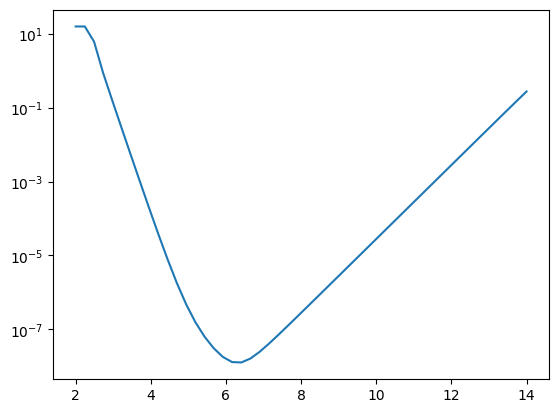

In [4]:
pH_arr = np.linspace(2,14,50)
Al_arr = np.array([Gibbsite_Sol(pH) for pH in pH_arr])
plt.plot(pH_arr, Al_arr)
plt.semilogy()

In [174]:
Gibbsite_Sol(-1.0)

autodiff.real(15.6211, 0)

In [149]:
db = rkt.PhreeqcDatabase("phreeqc.dat")
for sp in db.species().withElements("H O Al"):
    print(sp.name())

H+
H2O
Al+3
Al(OH)2+
Al(OH)3
Al(OH)4-
AlOH+2
H2
OH-
O2
Al(OH)3(a)
Gibbsite
H2(g)
H2O(g)
O2(g)


In [36]:
for phase in system.phases():
    print(phase.name())
    for species in phase.species():
        print(":: " + species.name())

AqueousPhase
:: H+
:: H2O
:: Al+3
:: Al(OH)2+
:: Al(OH)3
:: Al(OH)4-
:: AlOH+2
:: H2
:: OH-
:: O2
Gibbsite
:: Gibbsite
